# Дилотация и эрозия
В данной работе реализуется дилотация и эрозия изображений.
Как обычно, для начала импортируем все необходимые модули.

In [1]:
import numpy as np
%matplotlib inline
import reader
import grapher

Загрузим и покажем наше исходное изображение.

Image shape:  (300, 400)


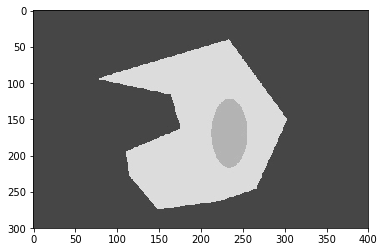

In [2]:
col_num, row_num, depth, image_data = reader.jpg_reader("data/MODEL.jpg", channels=1)
print('Image shape: ', image_data.shape)
grapher.set_image(image_data, cmap="gray", normalize=False)

Создадим абстрактную функцию для применения некоей функции к части массива при выполнении условий.  
Данная функция полезна нам тем, что пригодится в будущем при обработке изображений методом "окна".

In [3]:
def apply_under_matrix(array: np.ndarray, matrix_size: int,
                       activation_function, applying_function) -> np.ndarray:
	
	if matrix_size % 2 != 1:
		raise NotImplementedError("Only odd kernels are allowed (1x1, 3x3, 5x5 etc)")
	y, x = array.shape

	m2 = matrix_size // 2
	new_image = np.copy(array)
	for i in range(m2, y - m2):
		for j in range(m2, x - m2):
			if activation_function(array[i][j]):
				new_image[(i - m2):(i + m2 + 1), (j - m2):(j + m2 + 1)] = applying_function(array[(i - m2):(i + m2 + 1), (j - m2):(j + m2 + 1)])
	return new_image

Сделаем эрозию изображения - в качестве активационной функции передадим распознавание фона (значение пикселя меньше 100), всем элементам окна будем присваивать значение центрального элемента.  
Таким образом, если центр окна находится на фоне, то все пиксели этого окна также становятся фоном.

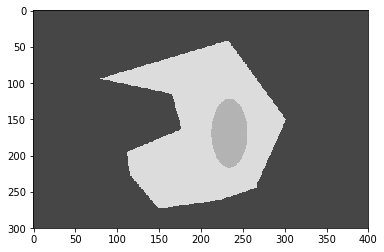

In [4]:
matrix_size = 3
erosed = apply_under_matrix(image_data, matrix_size, lambda x: x < 100, lambda arr: arr[1, 1])
grapher.set_image(erosed, cmap="gray", normalize=False)

Вычтем из изначального изображения эрозию и таким образом получим границы данного изображения.

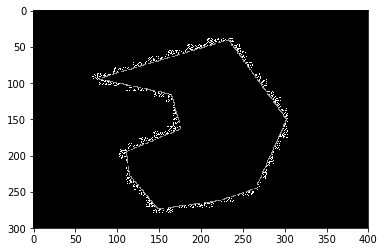

In [5]:
grapher.set_image(image_data - erosed, cmap="gray", normalize=False)

Аналогичным способом сделаем дилотацию - применяемая функция остается та же, но меняется активационная, которая теперь срабатывает на наличие объекта.  
Таким образом, если центральный пиксель окна стоит на объекте, то все пиксели окна становятся объектом.

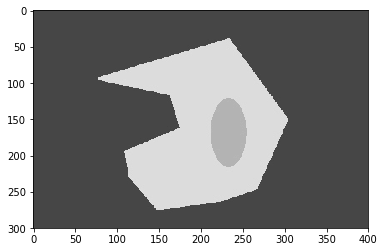

In [6]:
matrix_size = 3
dilotated = apply_under_matrix(image_data, matrix_size, lambda x: x > 100, lambda arr: arr[1, 1])
grapher.set_image(dilotated, cmap="gray", normalize=False)

Вычитая из дилотации изначальное эрозию и изначальное изображение, можем получить границы и удвоенные границы объекта.

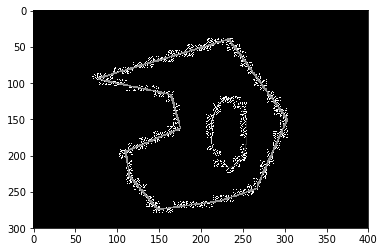

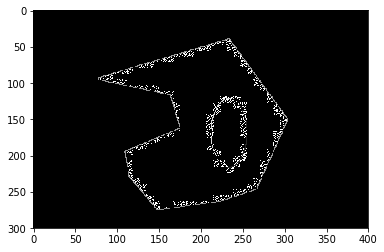

In [7]:
grapher.set_image(dilotated - erosed, cmap="gray", normalize=False)
grapher.set_image(dilotated - image_data, cmap="gray", normalize=False)